In [1]:
# -----------------------------------------------
# Initially Import.
# -----------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal

from sklearn.decomposition import FastICA, PCA


In [107]:
# -----------------------------------------------
# Load Data and Pre-Processing.
# -----------------------------------------------

# Testing data.Generate by using numpy lib.
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size = S.shape) 

S /= S.std(axis=0)

A = np.array([[1,1,1], [0.5,2,1.0], [1.5,1.0,2.0]])
X = np.dot(S, A.T)

# sEMG signals data.
dataset = loadmat('detop_exp01_subj22_Sess1_003.mat')
t_s_data = dataset['emg'][0:10]
print(t_s_data)
t_s_data = t_s_data
print(t_s_data)
t_s_data = t_s_data.T

t_s_data.shape


[[-0.39980037 -0.14282592  0.02298293 ...  1.87011619 -1.91394809
  -5.26132929]
 [-0.62641422 -0.47646778 -0.63697203 ...  1.49361024 -1.19927533
  -3.89955681]
 [-1.75083715 -2.24313449 -2.55218714 ...  2.00388322 -0.93258465
  -3.39336503]
 ...
 [-0.62006556 -0.7872393  -0.62706141 ...  1.68024744 -1.46471058
  -3.09444902]
 [-0.98116481 -1.01421189 -0.36412981 ...  1.6859157  -0.36218293
  -2.27336536]
 [-0.77174929 -1.00512629 -1.42548694 ...  2.38457572 -0.97067147
  -3.81042042]]
[[-0.39980037 -0.14282592  0.02298293 ...  1.87011619 -1.91394809
  -5.26132929]
 [-0.62641422 -0.47646778 -0.63697203 ...  1.49361024 -1.19927533
  -3.89955681]
 [-1.75083715 -2.24313449 -2.55218714 ...  2.00388322 -0.93258465
  -3.39336503]
 ...
 [-0.62006556 -0.7872393  -0.62706141 ...  1.68024744 -1.46471058
  -3.09444902]
 [-0.98116481 -1.01421189 -0.36412981 ...  1.6859157  -0.36218293
  -2.27336536]
 [-0.77174929 -1.00512629 -1.42548694 ...  2.38457572 -0.97067147
  -3.81042042]]


(105561, 10)

In [108]:
# -----------------------------------------------
# Compute ICA.
# -----------------------------------------------

ica = FastICA(whiten = True)
Source_signals = ica.fit_transform(t_s_data)
A_ = ica.mixing_


In [109]:
Source_signals = Source_signals.T

In [110]:
# ------------------------------------------------
# Source Signals Extract.
# First plot to check.
# ------------------------------------------------

time = np.zeros(105561)
for i in range(0, 105561):
    time[i] = float(i)/2048

#Source_channels = np.zeros(20)

#Extract_signals = Source_signals

# channels which might extarct the firing spikes.
# 9,12,17,22,52,56,67,102,107
#for i in range(0,10):
#    for j in range(0,105561):
#        if Source_signals[i, j] >= 0.2 or Source_signals[i, j] <= 0.2:
#            print(i)

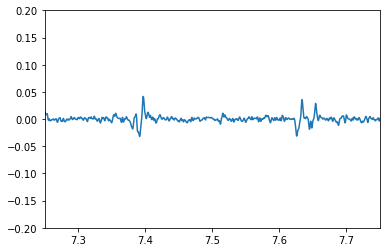

In [124]:
E_S1 = Source_signals[8].copy()
#E_S2 = Source_signals[12].copy()
plt.plot(time, E_S1)
plt.xlim(7.25,7.75)
plt.ylim(-0.2, 0.2)
plt.show()

In [47]:
for i in range(0,105561):
    if E_S1[i] >= 0.013 or E_S1[i] <= -0.013:
        E_S1[i] = 1
    else:
        E_S1[i] = 0

for i in range(0,105561):
    if E_S2[i] >= 0.013 or E_S2[i] <= -0.013:
        E_S2[i] = 1
    else:
        E_S2[i] = 0

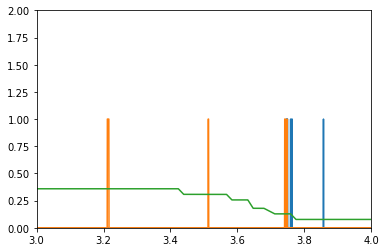

In [53]:
plt.plot(time, E_S1, time, E_S2, time, dataset['glove'][0])
plt.xlim(3,4)
plt.ylim(0, 2)
plt.show()

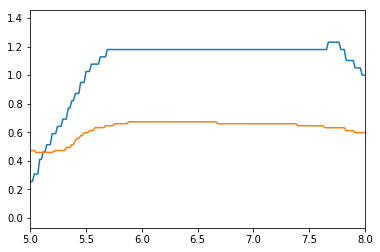

In [100]:
mov_angle = dataset['glove']
plt.plot(time, mov_angle[0], time, mov_angle[1])
plt.xlim(5,8)
plt.show()